<a href="https://colab.research.google.com/github/jkellett11/sds510/blob/main/Module_3_Basic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#I had an parsererror reading in the csv with the following line.
#df = pd.read_csv('crimestatphx.csv')

#trying to identify the issue in the line
for i, line in enumerate(open('crimestatphx.csv')):
  if i ==131677:
    print(line)
    break

"201700002107372",11/17/2017  06:00,11/30/2017  06:00,"BURGLARY","68XX N 25TH DR","85017","A


In [3]:
#the last row of the dataframe has an error due to the unclosed brackets, normally I would fix the error by appending the row with a '"'.
#however, after examining the file .. since there are multiple premise types that begin with the letter "a" I am not certain what type it actually is.
#thus, i will be using the 'on_bad_lines='skip'' to drop that line.
df = pd.read_csv('crimestatphx.csv', engine='python', on_bad_lines='skip')
df.tail(2)

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
131674,201700002024523,11/17/2017 05:34,NaN,AGGRAVATED ASSAULT,8XX N 59TH AVE,85043.0,ABANDONED/CONDEMNED STRUCTURE
131675,201700002030009,11/17/2017 05:50,11/17/2017 07:50,BURGLARY,51XX N 39TH DR,85019.0,SINGLE FAMILY HOUSE


In [4]:
#getting of the look of the data within
df.info()
#examining the percentage of each crime in the data set
crimepercent = round(df['UCR CRIME CATEGORY'].value_counts(normalize=True) * 100, 2)
display(crimepercent)
print('\nCrimes related to theft rank among the top three most reported crimes in this dataset with larceny-theft with 50.29%, burglary with 17.96%\n and vechile theft with 10.93%. Conversely, rape, arson, and murder are the least reported with 1.5%, .48% and .22%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131676 entries, 0 to 131675
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   INC NUMBER          131676 non-null  object 
 1   OCCURRED ON         131360 non-null  object 
 2   OCCURRED TO         93174 non-null   object 
 3   UCR CRIME CATEGORY  131676 non-null  object 
 4   100 BLOCK ADDR      131676 non-null  object 
 5   ZIP                 131673 non-null  float64
 6   PREMISE TYPE        130919 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


,proportion
UCR CRIME CATEGORY,
LARCENY-THEFT,50.29
BURGLARY,17.96
MOTOR VEHICLE THEFT,10.93
DRUG OFFENSE,7.27
AGGRAVATED ASSAULT,7.07
ROBBERY,4.28
RAPE,1.50
ARSON,0.48
MURDER AND NON-NEGLIGENT MANSLAUGHTER,0.22



Crimes related to theft rank among the top three most reported crimes in this dataset with larceny-theft with 50.29%, burglary with 17.96%
 and vechile theft with 10.93%. Conversely, rape, arson, and murder are the least reported with 1.5%, .48% and .22%


In [5]:
#defining variable 'crime names' to use in future grouping code
df['PREMISE TYPE'].value_counts()
crimenames = df['UCR CRIME CATEGORY'].unique()
print(crimenames)

['MOTOR VEHICLE THEFT' 'RAPE' 'LARCENY-THEFT' 'DRUG OFFENSE' 'BURGLARY'
 'AGGRAVATED ASSAULT' 'MURDER AND NON-NEGLIGENT MANSLAUGHTER' 'ROBBERY'
 'ARSON']


In [6]:
#initally I used this method to group the crimes and locations..
#however, once I saw that only a portion was printed, I used a for loop to look at all the groups.
dflocation = df.groupby('UCR CRIME CATEGORY')
#examining the counts of each crime by premise type
locationcounts = dflocation['PREMISE TYPE'].value_counts()
print(locationcounts)
#examining the percentage of each crime by premise type
locationpercent = round(dflocation['PREMISE TYPE'].value_counts(normalize=True) * 100, 2)
print(locationpercent)

UCR CRIME CATEGORY  PREMISE TYPE                       
AGGRAVATED ASSAULT  APARTMENT                              2167
                    STREET / ROADWAY / ALLEY / SIDEWALK    2060
                    SINGLE FAMILY HOUSE                    2033
                    PARKING LOT                             724
                    PARK / PLAYGROUND                       233
                                                           ... 
ROBBERY             MOUNTAIN AREA                             1
                    NURSING CARE                              1
                    RAIL STOP                                 1
                    REST AREA                                 1
                    STOREROOM/SHED (COMMERCIAL)               1
Name: count, Length: 534, dtype: int64
UCR CRIME CATEGORY  PREMISE TYPE                       
AGGRAVATED ASSAULT  APARTMENT                              23.46
                    STREET / ROADWAY / ALLEY / SIDEWALK    22.30
               

In [7]:
#here I used a for loop to group each crime by location
#although the crimes are in a different order we can see the number match up.
for crime in crimenames:
  print(f'\ncrime: {crime}\n')
  crimefilter =  df[df['UCR CRIME CATEGORY'] == crime]
  print(round(crimefilter['PREMISE TYPE'].value_counts(normalize=True).sort_values(ascending=False)*100, 2))


crime: MOTOR VEHICLE THEFT

PREMISE TYPE
PARKING LOT                            28.51
STREET / ROADWAY / ALLEY / SIDEWALK    16.75
SINGLE FAMILY HOUSE                    16.12
APARTMENT                              13.02
DRIVEWAY                                6.53
                                       ...  
RAIL STOP                               0.01
BUS                                     0.01
STOREROOM/SHED (RESIDENTIAL)            0.01
SHELTER-MISSION/HOMELESS                0.01
FIELD/WOODS                             0.01
Name: proportion, Length: 68, dtype: float64

crime: RAPE

PREMISE TYPE
SINGLE FAMILY HOUSE                     31.01
APARTMENT                               26.63
VEHICLE                                  6.31
STREET / ROADWAY / ALLEY / SIDEWALK      5.96
UNKNOWN                                  5.80
HOTEL / MOTEL                            5.30
PARKING LOT                              2.60
PARK / PLAYGROUND                        2.60
OTHER                  

**Most Common Locations for Each Crime**

In [8]:
#grouping crimes by their top 3 most / least common locations
#created a for loop to iterate each crime, returning the value counts for each location type.
for crime in crimenames:
  #print(f'\ncrime: {crime}\n')
  crimefilter2 =  df[df['UCR CRIME CATEGORY'] == crime]
  # using 'normalize=True' to return the percentages of the occurrence of each crime type by location
  print('MOST COMMON PREMISE TYPE:')
  maxlocation = round((crimefilter2['PREMISE TYPE'].value_counts(normalize=True).sort_values(ascending=False).head(3)) *100, 2)
  #display(maxlocation)

  #print('LEAST COMMON PREMISE TYPE:')
  minlocation = round((crimefilter2['PREMISE TYPE'].value_counts(normalize=True).sort_values(ascending=False).tail(3))*100, 2)
  #display(minlocation)

  print(f'The top 3 most common locations for {crime} are: \n{maxlocation}\n')
  print(f'Whereas the top 3 least common locations for {crime} are: \n{minlocation}\n')

MOST COMMON PREMISE TYPE:
The top 3 most common locations for MOTOR VEHICLE THEFT are: 
PREMISE TYPE
PARKING LOT                            28.51
STREET / ROADWAY / ALLEY / SIDEWALK    16.75
SINGLE FAMILY HOUSE                    16.12
Name: proportion, dtype: float64

Whereas the top 3 least common locations for MOTOR VEHICLE THEFT are: 
PREMISE TYPE
STOREROOM/SHED (RESIDENTIAL)    0.01
SHELTER-MISSION/HOMELESS        0.01
FIELD/WOODS                     0.01
Name: proportion, dtype: float64

MOST COMMON PREMISE TYPE:
The top 3 most common locations for RAPE are: 
PREMISE TYPE
SINGLE FAMILY HOUSE    31.01
APARTMENT              26.63
VEHICLE                 6.31
Name: proportion, dtype: float64

Whereas the top 3 least common locations for RAPE are: 
PREMISE TYPE
SHOPPING MALL                   0.05
STOREROOM/SHED (RESIDENTIAL)    0.05
SPECIALTY STORE                 0.05
Name: proportion, dtype: float64

MOST COMMON PREMISE TYPE:
The top 3 most common locations for LARCENY-THEFT are:

**Exploring Crimes by Zip Code / Zip Code Group**

In [9]:
#here I wanted to examine the count of each crime category by zip code.
#this presentation again only shows a portion due to the size of the dataset.
dfzip = df.groupby('UCR CRIME CATEGORY')
dfzip['ZIP'].value_counts()

UCR CRIME CATEGORY  ZIP    
AGGRAVATED ASSAULT  85008.0    516
                    85009.0    482
                    85015.0    476
                    85017.0    476
                    85041.0    429
                              ... 
ROBBERY             85301.0      1
                    85303.0      1
                    85331.0      1
                    85337.0      1
                    85345.0      1
Name: count, Length: 561, dtype: int64

While my previous exploration into the data by grouping the zip codes was fine, the results won't neccessarily help an officer or potential future resident of a community if they desire crime rates in the area. Thus, I think they would be better served by grouping the zip codes by area, five groups in fact. As the majority of zips are in the city of phoenix, there groups were as follows: 'central phx', 'north phx', 'south phx' and 'west phx'. Note: I didn't include an 'east phx' has most of those zips fell under the 'central phx' or the 'north phx' category. Those that laid beyond the city of phoenix, I put into two groups, 'east' and 'west'.

In [10]:
#printing every zip code so I can begin categorizing.
print(df['ZIP'].sort_values(ascending=True).unique())
#printing the number of null values in the zip code column
print(f'Total null values: {df['ZIP'].isnull().sum()}')

[85003. 85004. 85006. 85007. 85008. 85009. 85012. 85013. 85014. 85015.
 85016. 85017. 85018. 85019. 85020. 85021. 85022. 85023. 85024. 85027.
 85028. 85029. 85031. 85032. 85033. 85034. 85035. 85037. 85040. 85041.
 85042. 85043. 85044. 85045. 85048. 85050. 85051. 85053. 85054. 85083.
 85085. 85086. 85087. 85201. 85202. 85203. 85204. 85210. 85212. 85213.
 85215. 85224. 85225. 85226. 85233. 85234. 85248. 85251. 85253. 85254.
 85255. 85257. 85258. 85260. 85266. 85268. 85281. 85282. 85283. 85286.
 85290. 85295. 85296. 85301. 85302. 85303. 85304. 85305. 85306. 85307.
 85308. 85310. 85323. 85326. 85331. 85335. 85337. 85338. 85339. 85345.
 85353. 85363. 85381. 85382. 85383. 85392. 85395. 85396.    nan]
Total null values: 3


In [11]:
#I tried to group zip codes within their area of phx
#if the zip code lied beyond phx I simply classified it directionally to the best of my ability.
zipcodegroups = {'CENTRAL PHX':[85003, 85004, 85006, 85007, 85008,
                                85009, 85012, 85013, 85014, 85015, 85016, 85017, 85018, 85019, 85034],

                 'NORTH PHX': [85020, 85021, 85022, 85023, 85024, 85027,85028,
                               85029, 85032, 85050, 85051, 85053, 85054, 85083, 85085, 85086, 85087],
                 'SOUTH PHX': [85040, 85041, 85042, 85043, 85044, 85045, 85048],

                 'WEST PHX': [85031, 85033, 85035, 85037],

                 'EAST': [85201, 85202, 85203, 85204, 85210, 85212, 85213, 85215, 85224, 85225,
                          85226, 85233, 85234, 85248, 85251, 85253, 85254, 85255, 85257, 85258,
                          85260, 85266, 85268, 85281, 85282, 85283, 85286, 85290, 85295, 85296],

                 'WEST':[85301, 85302, 85303, 85304, 85305,
                         85306, 85307, 85308, 85310, 85323,85326, 85331, 85335, 85337, 85338,
                         85339, 85345, 85353, 85363, 85381, 85382, 85383, 85392, 85395, 85396]}

In [12]:
#I kept running into errors when adding the column into the df until I realized I had to flip the dictionary to get the correct dictionary key.
ziparea = {zipcode: area for area, zips in zipcodegroups.items() for zipcode in zips}

In [13]:
#mapping the area keys to the zip codes in the 'ZIP' column to create a new 'AREA' column
df['AREA'] = df['ZIP'].map(ziparea)
#checking that it worked correctly
display(df.head(3))
#checking that we have the same number of NA values
df['AREA'].isna().sum()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,AREA
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,NORTH PHX
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE,CENTRAL PHX
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,CENTRAL PHX


np.int64(3)

In [14]:
#grouping the crimes by areas to get an idea of the breakdown among areas
dfzipgroup = df.groupby('UCR CRIME CATEGORY')
dfzipgroup['AREA'].value_counts()

UCR CRIME CATEGORY                     AREA       
AGGRAVATED ASSAULT                     CENTRAL PHX     3795
                                       NORTH PHX       2356
                                       SOUTH PHX       1446
                                       WEST PHX        1206
                                       WEST             434
                                       EAST              69
ARSON                                  CENTRAL PHX      256
                                       NORTH PHX        176
                                       SOUTH PHX        104
                                       WEST PHX          74
                                       WEST              22
                                       EAST               2
BURGLARY                               CENTRAL PHX     8372
                                       NORTH PHX       6486
                                       SOUTH PHX       4002
                                       WEST PHX        3023
                                       WEST            1466
                                       EAST             298
DRUG OFFENSE                           CENTRAL PHX     4475
                                       NORTH PHX       2854
                                       SOUTH PHX       1001
                                       WEST PHX         933
                                       WEST             234
                                       EAST              75
LARCENY-THEFT                          CENTRAL PHX    24316
                                       NORTH PHX      21157
                                       SOUTH PHX       9823
                                       WEST PHX        6482
                                       WEST            3404
                                       EAST            1032
MOTOR VEHICLE THEFT                    CENTRAL PHX     5327
                                       NORTH PHX       3462
                                       SOUTH PHX       2509
                                       WEST PHX        2232
                                       WEST             768
                                       EAST              93
MURDER AND NON-NEGLIGENT MANSLAUGHTER  CENTRAL PHX      117
                                       NORTH PHX         62
                                       SOUTH PHX         49
                                       WEST PHX          40
                                       WEST              21
RAPE                                   CENTRAL PHX      870
                                       NORTH PHX        525
                                       SOUTH PHX        247
                                       WEST PHX         193
                                       WEST             100
                                       EAST              45
ROBBERY                                CENTRAL PHX     2549
                                       NORTH PHX       1178
                                       SOUTH PHX        843
                                       WEST PHX         825
                                       WEST             215
                                       EAST              30
Name: count, dtype: int64

In [15]:
#looking at the most frequented area by crime (percentage):
for crime in crimenames:
  print(f'\ncrime: {crime}\n')
  crimefilter =  df[df['UCR CRIME CATEGORY'] == crime]
  #using normalize='True' to get the percentages
  print(crimefilter['AREA'].value_counts(normalize=True).sort_values(ascending=False))


crime: MOTOR VEHICLE THEFT

AREA
CENTRAL PHX    0.370162
NORTH PHX      0.240567
SOUTH PHX      0.174345
WEST PHX       0.155097
WEST           0.053367
EAST           0.006462
Name: proportion, dtype: float64

crime: RAPE

AREA
CENTRAL PHX    0.439394
NORTH PHX      0.265152
SOUTH PHX      0.124747
WEST PHX       0.097475
WEST           0.050505
EAST           0.022727
Name: proportion, dtype: float64

crime: LARCENY-THEFT

AREA
CENTRAL PHX    0.367234
NORTH PHX      0.319525
SOUTH PHX      0.148352
WEST PHX       0.097895
WEST           0.051409
EAST           0.015586
Name: proportion, dtype: float64

crime: DRUG OFFENSE

AREA
CENTRAL PHX    0.467509
NORTH PHX      0.298161
SOUTH PHX      0.104576
WEST PHX       0.097472
WEST           0.024446
EAST           0.007835
Name: proportion, dtype: float64

crime: BURGLARY

AREA
CENTRAL PHX    0.354041
NORTH PHX      0.274284
SOUTH PHX      0.169239
WEST PHX       0.127839
WEST           0.061995
EAST           0.012602
Name: proportion,

Interesting find: the central phoenix area is the most frequented area across the nine crime types.

In [16]:
#creating a crime type column containing violent and non-violent values to categorize each crime using 'np.where'.
df['CRIME TYPE'] = np.where(df['UCR CRIME CATEGORY'].str.contains('ROBBERY|RAPE|MURDER AND NON-NEGLIGENT MANSLAUGHTER|AGGRAVATED ASSAULT'), 'VIOLENT', 'NONVIOLENT')
#checking mapping.
display(df.head(2))

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,AREA,CRIME TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,NORTH PHX,NONVIOLENT
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE,CENTRAL PHX,VIOLENT



Area: NORTH PHX



,proportion
CRIME TYPE,
NONVIOLENT,0.892278
VIOLENT,0.107722



Area: CENTRAL PHX



,proportion
CRIME TYPE,
NONVIOLENT,0.853605
VIOLENT,0.146395



Area: WEST



,proportion
CRIME TYPE,
NONVIOLENT,0.884454
VIOLENT,0.115546



Area: SOUTH PHX



,proportion
CRIME TYPE,
NONVIOLENT,0.870905
VIOLENT,0.129095



Area: WEST PHX



,proportion
CRIME TYPE,
NONVIOLENT,0.849147
VIOLENT,0.150853



Area: EAST



,proportion
CRIME TYPE,
NONVIOLENT,0.912409
VIOLENT,0.087591


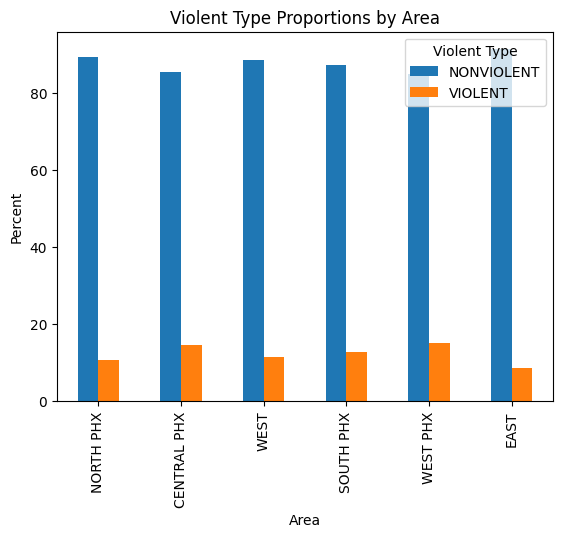

In [17]:
#percentage of non-violent or violent crime by area (zip codes)
#creating a proportions dictionary to be used when plotting
proportions ={}
#retrieving the area names needed to iterate through, and dropping NA values that may effect the plot.
areanames = df['AREA'].dropna().unique()

for area in areanames:
  print(f'\nArea: {area}\n')
  areafilter =  df[df['AREA'] == area]
  percents = areafilter['CRIME TYPE'].value_counts(normalize=True)
  display(percents)
  #adding the results (percents) into the proportions dictionary with 'area' as the key!
  proportions[area] = percents
#taking the result and transforming it in a dataframe as a percentage
perdf = pd.DataFrame(proportions).T * 100

#plotting violent type (bar)
perdf.plot(kind='bar')
plt.title('Violent Type Proportions by Area')
plt.ylabel('Percent')
plt.xlabel('Area')
plt.legend(title='Violent Type')

plt.show()

Crime Growth Rate Exploration

Before beginning the growth rate exploration, I will first convert the date columns, 'occurred on' and 'occurred to' columns with the {pd.to_datetime} function.

In [18]:
#converting the date columns to something useable for grouping using datetime
df['OCCURRED ON'] = pd.to_datetime(df['OCCURRED ON'])

df['OCCURRED TO'] = pd.to_datetime(df['OCCURRED TO'])
mindate = df['OCCURRED ON'].min()
maxdate = df['OCCURRED ON'].max()
#getting an idea of the time range of this dataset
print(mindate)
print(maxdate)

2015-11-01 00:00:00
2017-11-17 05:50:00


Next, I will examine the yearly growth rate of the crimes in this phoenix data set.

In [19]:
#extracting the year from the previously converted date column.
df['YEAR'] = df['OCCURRED ON'].dt.to_period('Y')
#getting a total count of crimes reported per year grouped by area.
yearcount = df.groupby(['AREA', 'YEAR']).size().reset_index(name='Number of Crimes')
display(yearcount)

,AREA,YEAR,Number of Crimes
0,CENTRAL PHX,2015,3804
1,CENTRAL PHX,2016,24150
2,CENTRAL PHX,2017,21974
3,EAST,2015,121
4,EAST,2016,848
5,EAST,2017,675
6,NORTH PHX,2015,2952
7,NORTH PHX,2016,18623
8,NORTH PHX,2017,16606
9,SOUTH PHX,2015,1583


Across all areas, the year 2016 had the highest number of cases reported than 2015 or 2017.

In [20]:
#GROWTH RATE (YEARLY) -- long term changes
#used pct_change to calculate the yearly change in the number of crimes year to year
yearcount['GrowthRate'] = yearcount.groupby('AREA')['Number of Crimes'].pct_change()*100
display(yearcount)

areagrowing = yearcount.groupby('AREA')['GrowthRate'].mean().sort_values(ascending=False)
display(areagrowing)

,AREA,YEAR,Number of Crimes,GrowthRate
0,CENTRAL PHX,2015,3804,NaN
1,CENTRAL PHX,2016,24150,534.858044
2,CENTRAL PHX,2017,21974,-9.010352
3,EAST,2015,121,NaN
4,EAST,2016,848,600.826446
5,EAST,2017,675,-20.400943
6,NORTH PHX,2015,2952,NaN
7,NORTH PHX,2016,18623,530.860434
8,NORTH PHX,2017,16606,-10.830693
9,SOUTH PHX,2015,1583,NaN


,GrowthRate
AREA,
EAST,290.212751
CENTRAL PHX,262.923846
NORTH PHX,260.014870
WEST,254.912788
WEST PHX,251.417145
SOUTH PHX,246.776965


The growth rate per year appears to support my previous observation that 2016 contained the dataset's peak for crime reporting. Followed by a decrease in the next year. Also note the NaN values in 2015, this occurred as there is no previous data to compare 2015 to, so please disregard. Regardless, compared to 2015, 2016 had the highest growth rate with each area having a percentage equal to or far greater than 246%. This finding could potentially be influenced by other confounding variables, thus these rates could push an official to examine other potential reasons. Thus giving the opportunity to try to curb these occurrences of crime by potential mitigating the confounding variables.

Additionally, home owners could use there year rates when trying to decide where to move. While rates did peak in 2016, it could potential give potential home owners a look into what it could be like to live in a given area.

In [21]:
#monthly exploration -- short term changes

#extracting the month from the 'OCCURRED ON' column
df['MONTH'] = df['OCCURRED ON'].dt.to_period('M')

#grouping the 'AREA' and 'MONTH' with the 'Total Number of Crimes for each month per area.
monthcount = df.groupby(['AREA', 'MONTH']).size().reset_index(name='Number of Crimes')
display(monthcount)

#GROWTH RATE (MONTHLY)
#used pct_change to calculate the monthly change in the number of crimes month to month
monthcount['GrowthRate'] = monthcount.groupby('AREA')['Number of Crimes'].pct_change()*100
display(monthcount)

#defining a variable to store the average monthly growth rate using '.mean()'
areagrowingmonth = monthcount.groupby('AREA')['GrowthRate'].mean().sort_values(ascending=False)
display(areagrowingmonth)

,AREA,MONTH,Number of Crimes
0,CENTRAL PHX,2015-11,1796
1,CENTRAL PHX,2015-12,2008
2,CENTRAL PHX,2016-01,1998
3,CENTRAL PHX,2016-02,1786
4,CENTRAL PHX,2016-03,2057
...,...,...,...
145,WEST PHX,2017-07,636
146,WEST PHX,2017-08,675
147,WEST PHX,2017-09,627
148,WEST PHX,2017-10,651


,AREA,MONTH,Number of Crimes,GrowthRate
0,CENTRAL PHX,2015-11,1796,NaN
1,CENTRAL PHX,2015-12,2008,11.804009
2,CENTRAL PHX,2016-01,1998,-0.498008
3,CENTRAL PHX,2016-02,1786,-10.610611
4,CENTRAL PHX,2016-03,2057,15.173572
...,...,...,...,...
145,WEST PHX,2017-07,636,-3.927492
146,WEST PHX,2017-08,675,6.132075
147,WEST PHX,2017-09,627,-7.111111
148,WEST PHX,2017-10,651,3.827751


,GrowthRate
AREA,
EAST,-0.294822
WEST,-0.806137
CENTRAL PHX,-0.920682
NORTH PHX,-1.014689
WEST PHX,-1.169756
SOUTH PHX,-1.612040


Based on these results, there appears to be a shrinking crime rate when looking at the month growth rate average. Based on my calculations, south phoenix is experiencing a -1.61% change, a positive shrink (1.161%) rate monthly. While the east area is experiencing the least amount of change, albeit still a positive shrink of .29%. It's important to note that monthly growth rate investigations may not show the whole picture of the crime rates--there could be other factors such as weather that could play a part in why there's rates are decreasing a tad. I personally, would be declining monthly rates as a plus but take them with a grain of salt if I were purchasing a home in a particular area.

In [22]:
display(df.head(4))

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,AREA,CRIME TYPE,YEAR,MONTH
0,201600000052855,2015-11-01,2016-01-09 00:00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE,NORTH PHX,NONVIOLENT,2015,2015-11
1,201600000594484,2015-11-01,NaT,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE,CENTRAL PHX,VIOLENT,2015,2015-11
2,201500002102327,2015-11-01,2015-11-01 09:00:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT,CENTRAL PHX,NONVIOLENT,2015,2015-11
3,201500002101405,2015-11-01,2015-11-01 05:00:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE,WEST,NONVIOLENT,2015,2015-11


Overall, a dataset like this could provide key insights to police officers and potential home owners alike. These insights could lead an officer to adjust their routes so they could service an area more to potentially try to lower rates or perhaps just to have more eyes on the potential root cause of a particular crime. Additionally, as previously mentioned this data could be instrumental in how a family may pick where to set down roots as well.